

Utilização de machine learning para otimizar a captação renumerada

Variável target é o RDC (Recibo de deposito Cooperativo)

In [1]:
import numpy as np
import pandas as pd

from feature_engine.imputation import  CategoricalImputer
from sklearn.pipeline import Pipeline

from feature_engine.imputation import  CategoricalImputer

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder

In [ ]:
#CARREGANDO A BASE
CAMINHO_DA_BASE = "SEU CAMINHO"
df = pd.read_csv('CAMINHO_DA_BASE' )

Análise exploratoria 

In [ ]:
print(len(df)) #SHAPE DA BASE
df.shape[1]

In [ ]:
#COLUNAS E TIPO COLUNAS
for coluna in df.columns:
    print(coluna , f"Tipo: {df[coluna].dtype}")

In [5]:
unique_countsdf = df.nunique() #valores unicos por coluna. 


In [ ]:
#No excel, ao extrair a base do IBM COGNOS, já possuiamos a visão que não se tinnha NULLS e valores vazios
print(unique_countsdf)
valores_nulos_ou_brancos = df.isnull().sum() + (df == '').sum()
print(valores_nulos_ou_brancos)

Mascarar variáveis

In [ ]:
#Aqui criamos um número aleatório para cada categoria das colunas escolhidas.
# O objetivo é nao ficar visualmente disponível o nome das amostras, pois tratam-se de dados CONFIDENCIAIS

colunas_para_mascarar = [
    "SUAS_COLUNAS"
]
mapeamentos = {}
def codificar_coluna(df, coluna):
    # Obter valores únicos na coluna
    valores_unicos = df[coluna].unique()
    # Criar mapeamento de valor para código
    mapeamento = {valor: idx for idx, valor in enumerate(valores_unicos, start=1)}
    # Armazenar mapeamento no dicionário
    mapeamentos[coluna] = mapeamento
    # Substituir valores na coluna pelo código correspondente
    df[coluna] = df[coluna].map(mapeamento)

# Aplicar a função de codificação para cada coluna na lista
for coluna in colunas_para_mascarar:
    codificar_coluna(df, coluna)

# Exibir os mapeamentos para ver os códigos atribuídos
for coluna, mapeamento in mapeamentos.items():
    print(f'Mapeamento para coluna {coluna}:')
    print(mapeamento)
    print()

#O print não vai ficar amostra porque o objetivo é justamente omitir as chaves codificadas para o leitor

In [8]:
df['RDC'] = df['Indicador_Produto_RDC'].apply(lambda x: 1 if x == 'SIM' else 0)
#coluna com indicador numerico

In [9]:
proporcao = df['RDC'].value_counts(normalize=True)
contagem = df['RDC'].value_counts()


In [ ]:
print (f"contagem {contagem} e proporcao {proporcao}")
#proporção da base com a veriavel target

In [11]:
df['PA'] = df['PA'].apply(lambda x: "digital" if x == 97 else 'fisico')
#diferenciando clientes do fisico e digital

In [ ]:
print(df)
#visualizando a base

In [13]:
proporcao = df['PA'].value_counts(normalize=True)
contagem = df['PA'].value_counts()


In [ ]:
print(f"contagem {contagem} e proporcao {proporcao}")
#O modelo será elaborado com amostras do PA Fisico, sabemos por conhecimento do negocio que os associados digitalmente em grande parte nao possuem a mesma dimensao de relacionamento quanto os que se associam fisicamente. 

Analise exploratoria de variaveis numericas e categoricas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#VARIAVEIS NUMERICAS 
# Calcular estatísticas
# Criando o boxplot

#Nos possuimos uma base de clientes com idade mais avançada
#
# Criando o boxplot
plt.figure(figsize=(4, 4))
sns.boxplot(x='Indicador_Produto_RDC', y='Idade', data=df)


plt.title('Distribuição da Idade por  Produto RDC')
plt.xlabel(' Produto RDC')
plt.ylabel('Idade')
plt.xticks(rotation=0)
# Exibindo o gráfico
plt.show()
min_val = df['Idade'].min()
mean_val = df['Idade'].mean()
median_val = df['Idade'].median()
max_val = df['Idade'].max()
std_val = df['Idade'].std()  # Desvio padrão
cv_val = (std_val / mean_val) * 100  # Coeficiente de variação em porcentagem

# Exibir resultados
print(f"Valor Mínimo: {min_val}")
print(f"Média: {mean_val}")
print(f"Mediana: {median_val}")
print(f"Valor Máximo: {max_val}")
print(f"Desvio Padrão: {std_val}")
q1 = df['Idade'].quantile(0.25)  # Primeiro Q1
q2 = df['Idade'].quantile(0.50)  
q3 = df['Idade'].quantile(0.75) 
print(f"Primeiro Quartil (Q1): {q1}")
print(f"Segundo Quartil (Q2/Mediana): {q2}")
print(f"Terceiro Quartil (Q3): {q3}")



In [ ]:

# Calcular estatísticas para Quantidade_Dependentes
#A grande maioria da bse nao possui dependentes
# Criando o boxplot
plt.figure(figsize=(4, 4))
sns.boxplot(x='Indicador_Produto_RDC', y='Quantidade_Dependentes', data=df)


plt.title('Distribuição da QTD DPDT por  Produto RDC')
plt.xlabel(' Produto RDC')
plt.ylabel('Quantidade_Dependentes')
plt.xticks(rotation=0)
# Exibindo o gráfico
plt.show()
min_dep = df['Quantidade_Dependentes'].min()
mean_dep = df['Quantidade_Dependentes'].mean()
median_dep = df['Quantidade_Dependentes'].median()
max_dep = df['Quantidade_Dependentes'].max()
std_dep = df['Quantidade_Dependentes'].std()  # Desvio padrão
cv_dep = (std_dep / mean_dep) * 100  # Coeficiente de variação em porcentagem

# Calcular os quartis para Quantidade_Dependentes
q1_dep = df['Quantidade_Dependentes'].quantile(0.25)  # Primeiro quartil
q2_dep = df['Quantidade_Dependentes'].quantile(0.50)  # Segundo quartil (Mediana)
q3_dep = df['Quantidade_Dependentes'].quantile(0.75)  # Terceiro quartil

# Exibir resultados para Quantidade_Dependentes
print("Quantidade de Dependentes:")
print(f"Valor Mínimo: {min_dep}")
print(f"Média: {mean_dep}")
print(f"Mediana: {median_dep}")
print(f"Valor Máximo: {max_dep}")
print(f"Desvio Padrão: {std_dep}")
print(f"Coeficiente de Variação: {cv_dep:.2f}%")
print(f"Primeiro Quartil (Q1): {q1_dep}")
print(f"Segundo Quartil (Q2/Mediana): {q2_dep}")
print(f"Terceiro Quartil (Q3): {q3_dep}")

In [ ]:
# Calcular estatísticas para renda
#existe nas base pessoas com rendas muito distintas. Produtores rurais com rendas de até 16 milhões e pessoas sem renda. 
#Ajustando a variavel para int
df['Renda_Bruta_Mensal'] = df['Renda_Bruta_Mensal'].str.replace(',', '.').astype(float)
plt.figure(figsize=(4, 4))
sns.boxplot(x='Indicador_Produto_RDC', y='Renda_Bruta_Mensal', data=df)


plt.title('Distribuição da Renda por  Produto RDC')
plt.xlabel(' Produto RDC')
plt.ylabel('Renda')
plt.xticks(rotation=0)
# Exibindo o gráfico
plt.show()
min_renda = df['Renda_Bruta_Mensal'].min()
mean_renda = df['Renda_Bruta_Mensal'].mean()
median_renda = df['Renda_Bruta_Mensal'].median()
max_renda = df['Renda_Bruta_Mensal'].max()
std_renda = df['Renda_Bruta_Mensal'].std()  # Desvio padrão
cv_renda = (std_renda / mean_renda) * 100  # Coeficiente de variação em porcentagem

# Calcular os quartis para Renda_Bruta_Mensal
q1_renda = df['Renda_Bruta_Mensal'].quantile(0.25)  # Primeiro quartil
q2_renda = df['Renda_Bruta_Mensal'].quantile(0.50)  # Segundo quartil (Mediana)
q3_renda = df['Renda_Bruta_Mensal'].quantile(0.75)  # Terceiro quartil

# Exibir resultados para Renda_Bruta_Mensal
print("\nRenda Bruta Mensal:")
print(f"Valor Mínimo: {min_renda}")
print(f"Média: {mean_renda}")
print(f"Mediana: {median_renda}")
print(f"Valor Máximo: {max_renda}")
print(f"Desvio Padrão: {std_renda}")
print(f"Coeficiente de Variação: {cv_renda:.2f}%")
print(f"Primeiro Quartil (Q1): {q1_renda}")
print(f"Segundo Quartil (Q2/Mediana): {q2_renda}")
print(f"Terceiro Quartil (Q3): {q3_renda}")

Categorizando variaveis numericas

In [ ]:
#A cateogrização das variáveis auxilia em lidar com outliers e mascarar valores da base
#cateogrizando variavel idade
decis = df['Idade'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Converter os quantis para uma lista
decis = decis.values.tolist()

# Calcular o IQR e os limites para outliers
q1 = df['Idade'].quantile(0.25)
q3 = df['Idade'].quantile(0.75)
iqr = q3 - q1


limite_superior = q3 + 1.5 * iqr

bins = [-float('inf')] + decis + [limite_superior, float('inf')]
labels = ["Idade_1", "Idade_2", "Idade_3", "Idade_4", "Idade_5", "Idade_6", "Idade_7", "Idade_8", "Idade_9", "Idade_10", "Outlier_Superior"]

#verificando cadastros incompletos/ nao realizados
#Aqui por co nhecimento sabemos que cadastros que estão formatados dessa forma é porque nao tiverem definitivamente ma finalização de cadastro. 
df ['novoidade'] = pd.cut(df['Idade'], bins=bins, labels= labels)
cd = (df['Data_Primeira_Atualização_Renda'] == '01/01/1900') & (df['Renda_Bruta_Mensal'] == 0)
df['novoidade'] = np.where(cd, 'NA', df['novoidade'])
proporcao = df['novoidade'].value_counts(normalize=True)
contagem = df['novoidade'].value_counts()
print (f"contagem {contagem} e proporcao {proporcao}")

In [ ]:
#Ajustando a variavel para int


df['Renda_Bruta_Mensal'] = df['Renda_Bruta_Mensal'].astype(int)
#cateorizando variavel  renda
decis = df['Renda_Bruta_Mensal'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
decis = decis.values.tolist()


bins = [-float('inf'), decis[0], decis[1], decis[2], decis[3], decis[4], decis[5], decis [6], decis [7], decis [8], float('inf')]
# Calcular o IQR e os limites para outliers
q1 = df['Renda_Bruta_Mensal'].quantile(0.25)
q3 = df['Renda_Bruta_Mensal'].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr
labels = [ "Renda_1", "Renda_2", "Renda_3", "Renda_4", "Renda_5", "Renda_6", "Renda_7", "Renda_8", "Renda_9", "Renda_10"]
df ['novorenda'] = pd.cut(df['Renda_Bruta_Mensal'], bins=bins, labels= labels)

# O outlier valor de outlier superior representa valor de corte semelhante as variáveis encontradas no ultimo decil = renda_10
#verificando renda inválida
cd = (df['Data_Primeira_Atualização_Renda'] == '01/01/1900') & (df['Renda_Bruta_Mensal'] == 0)
df['novorenda'] = np.where(cd, 'NA', df['novorenda'])

#verificando renda inválida
cd = (df['Data_Primeira_Atualização_Renda'] == '01/01/1900') & (df['Renda_Bruta_Mensal'] == 0)
df['novorenda'] = np.where(cd, 'NA', df['novorenda'])


proporcao = df['novorenda'].value_counts(normalize=True)
contagem = df['novorenda'].value_counts()
print (f"contagem {contagem} e proporcao {proporcao}")

In [ ]:
#Extraindo dados das principais categorias #proporção
#Os insights foram colocados na apresentação 
# Lista de strings
colunas_para_converter = [
     "SUAS_COLUNAS"
 
]

# Converter as colunas de int64 para object
df[colunas_para_converter] = df[colunas_para_converter].astype('category')

#VARIAVEIS CATEGORICAS 
def create_category_summary(df, category_columns, target_col):
    summary = {}
    
    for col in category_columns:
        # Contagem total e proporção geral de cada categoria
        total_counts = df[col].value_counts()
        total_proportions = df[col].value_counts(normalize=True)
        
        # Filtrar onde target_col = 1 e contar as ocorrências por categoria
        target_1_counts = df[df[target_col] == 1][col].value_counts()
        
        
        # Filtrar onde target_col = 0 e contar as ocorrências por categoria
        target_0_counts = df[df[target_col] == 0][col].value_counts()
        
        target_1_proportions = target_1_counts / (target_1_counts + target_0_counts)
        target_0_proportions = target_0_counts / (target_1_counts + target_0_counts)
        
        # Criar a tabela combinando valores nominais e proporções
        table = pd.DataFrame({
            'Total (Proporção Geral)': total_counts.astype(str) + ' (' + (total_proportions * 100).round(2).astype(str) + '%)',
            'Target=1 (Proporção)': target_1_counts.astype(str) + ' (' + (target_1_proportions * 100).round(2).astype(str) + '%)',
            'Target=0 (Proporção)': target_0_counts.astype(str) + ' (' + (target_0_proportions * 100).round(2).astype(str) + '%)',
        })
         # Ordenar pela coluna de total
        table['Total'] = total_counts  # Adiciona a coluna de contagem numérica
        sorted_table = table.sort_values(by='Total', ascending=False).drop(columns=['Total'])
        
        # Adicionar a tabela ao resumo
        summary[col] = sorted_table
      
        
    
    return summary

# Definindo as colunas categóricas e a coluna alvo
categorical_columns = ["SUAS_COLUNAS"]
target_column = 'RDC'

# Criar o resumo para todas as colunas categóricas
category_summary = create_category_summary(df, categorical_columns, target_column)

# Exibir as primeiras 10 linhas de cada tabela de resumo
for col, table in category_summary.items():
    print(f"\nResumo para a coluna: {col}")
    print(table.head(10))

In [21]:

# Categorizando a variável de qtd de dependentes
df['Quantidade_Dependentes'] = df['Quantidade_Dependentes'].apply(lambda x: 'Possui' if x > 0 else 'Não Possui')

df['Quantidade_Dependentes'] = df['Quantidade_Dependentes'].astype('category')

In [22]:
df['Data_Início_Relacionamento'] = pd.to_datetime(df['Data_Início_Relacionamento'], dayfirst=True)
#data em formato DD/MM/AAA


In [23]:
#separando o metódo de associação a cooperativa entre fisico e digital
#essa separação se da pela diferença  comportamental abordagem entre os dois meios de relacionamento
df_digital = df[df['PA'] == 'digital']
df_fisico = df[df['PA'] == 'fisico']

In [24]:
#ponto para separação entre treino e Ooty
data = pd.to_datetime('01-01-2023')

In [ ]:
df_digital.head()

In [ ]:
from sklearn.model_selection import train_test_split
#divisao entre dados utilizado para treinamento e out of the year
base_1 = df_fisico[df_fisico['Data_Início_Relacionamento'] < data]
base_ot = df_fisico[df_fisico['Data_Início_Relacionamento'] >= data]



print(df.shape[1])
print(len(df_fisico))
print(len(df_digital))
print(len(base_1))



In [ ]:
print(base_ot.shape)
#tamanho da base OOTY

In [ ]:
print(base_ot['RDC'].value_counts(normalize=True))
#proporção da variavel resposta

Verificando features Correlacionadas

In [38]:
from feature_engine.selection import DropCorrelatedFeatures

# examinando todas as variáveis e buscando os conjuntos de features
# com coeficiente de pearson (correlação) acima de 0.8
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
correlated.fit(base_1)

correlated.correlated_feature_sets_
#Não encontrado variáveis correlacionadas

[]

equilibrando base

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#undersampling para equilibrio de base
xa = base_1.drop(columns='RDC')
ya = base_1['RDC']
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(xa, ya)
base_1 = pd.DataFrame(X_resampled, columns=xa.columns)
base_1['RDC'] = y_resampled
print(base_1['RDC'].value_counts(normalize=True))



In [ ]:
base_treino, base_teste = train_test_split(base_1, test_size=0.2, random_state=43) #treino e teste
print(base_treino.shape)
print(base_teste.shape)

In [ ]:
#colunas e categorias
#nova base e suas categorias
for coluna in df.columns:
    print(coluna , f"Tipo: {base_treino[coluna].dtype}")

Construindo bases para facilitar o input da Modelagem

In [ ]:
# Variáveis-chave
key_vars = ['Número_Cliente' ]

# Variáveis categóricas
cat_vars = ["SUAS_COLUNAS"] 

target = 'RDC'
base_xtreino = base_treino[cat_vars+[target]]
base_xteste = base_teste[cat_vars+[target]]
base_treino_x = base_treino[cat_vars]
base_treino_y = base_treino[target]
base_teste_x = base_teste[cat_vars]
base_teste_y = base_teste[target]

base_xfisico = base_1[cat_vars]
base_yfisico = base_1[target]
base_xdigital = df_digital[cat_vars]
base_ydigital = df_digital[target]

base_otx = base_ot[cat_vars]
base_oty = base_ot[target]


Estatitisca Tradicional

In [48]:
import pycaret
pycaret.__version__
from pycaret.classification import *

In [ ]:
# Obter o número de categorias únicas para cada coluna
unique_counts = base_xtreino.nunique()

# Exibir o número de categorias únicas para cada coluna
print(unique_counts)

In [ ]:
exp_setup = setup(data= base_xtreino, test_data=base_xteste, target=target,
                   categorical_features=cat_vars,  session_id=42,  max_encoding_ohe=30)

In [ ]:
get_config('pipeline')
#passo a passo de trabalho com a base até formação da regressao logistica

In [52]:
#A regresasao logistica foi escolhida por entre os modelos demosntrados na primeira fase é o que melhor pertinente para classificação
lr = create_model('lr', fold=4)
#realizando strkfold para verificar desempenho do modelo em partes segmentadas da parte
#por escolha decidi 4 divisões

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6892,0.7569,0.6976,0.6863,0.6919,0.3784,0.3785
1,0.6927,0.7613,0.7046,0.6885,0.6965,0.3855,0.3856
2,0.6836,0.7481,0.6975,0.6788,0.6881,0.3673,0.3674
3,0.6911,0.7606,0.7013,0.6874,0.6943,0.3821,0.3822
Mean,0.6892,0.7567,0.7003,0.6853,0.6927,0.3783,0.3784
Std,0.0034,0.0053,0.0029,0.0038,0.0031,0.0068,0.0068


In [ ]:
plot_model(lr, plot='confusion_matrix')

In [54]:
#metricas do modelo teste
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_true = get_config('y_test_transformed')
y_pred = lr.predict(get_config('X_test_transformed'))
y_prob = lr.predict_proba(get_config('X_test_transformed'))[:, 1] 

true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_pred).ravel()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_prob)

# Exibe os resultados
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")
#obsevamos um dempenho razoavel a bom na base teste

Acurácia: 0.6912
Precisão: 0.6866
Recall: 0.7015
AUC: 0.7609


BASE OOTY LR

In [ ]:
#Retreinando o modelo com os dados disponiveis na base OOTY
from sklearn.linear_model import LogisticRegression

lr2 = Pipeline(steps=[

    ("categoric_imputer", CategoricalImputer(variables=cat_vars, fill_value="missing")),
    ("one", OneHotEncoder(variables=cat_vars)),
    ("CAT", LogisticRegression(random_state=42))
])


lr2.fit(base_xfisico, base_yfisico)

Matriz de Confusão:
[[9839 2003]
 [ 708  729]]


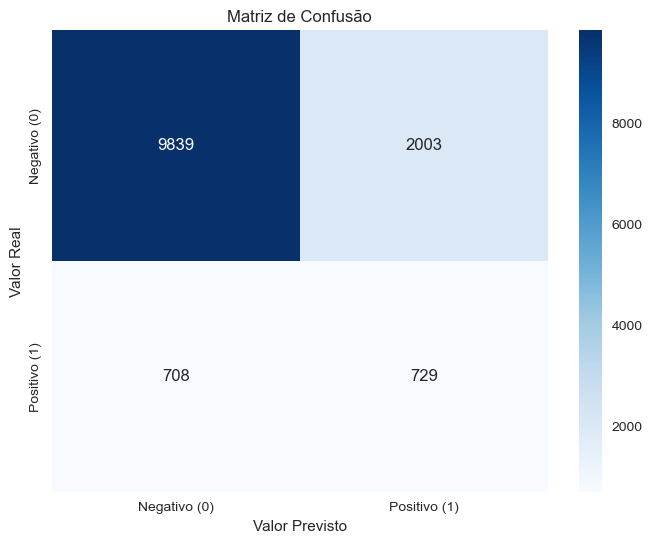

In [57]:
probas = lr2.predict_proba(base_otx)[:, 1]


limiar = 0.5
# Classificação com base no limiar
previsoes_lr= (probas >= limiar).astype(int)

cm = confusion_matrix(base_oty, previsoes_lr)
print("Matriz de Confusão:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

In [58]:
#escolhido os indices ks e auc para verificação do modelo em uma base com maior desequilibrio 
auc = roc_auc_score(base_oty, previsoes_lr)
print(f'AUC: {auc}')
from sklearn.metrics import roc_curve

# Calculando as taxas de verdadeiro positivo (TPR) e falso positivo (FPR)
fpr, tpr, thresholds = roc_curve(base_oty, probas)

# Calculando a diferença entre TPR e FPR (essa diferença é o KS)
ks_statistic = max(tpr - fpr)

# Mostrando o valor de KS
print(f'Índice KS: {ks_statistic:.4f}')

#observamos que existe um razoavel a bom poder de distinção

AUC: 0.6690815818154059
Índice KS: 0.3730


Modelagem com IA

In [545]:
compare_models(fold=4, sort='Accuracy')

#catboost escolhido por ter melhore metricas de acuracia e AUC
#metrica utilizada por conta de diferença de amostras entre target 0 e 1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6911,0.7599,0.7163,0.6821,0.6988,0.3822,0.3827,3.1100
ridge,Ridge Classifier,0.6899,0.7565,0.7043,0.6848,0.6944,0.3798,0.3800,0.4850
lda,Linear Discriminant Analysis,0.6898,0.7564,0.7040,0.6848,0.6943,0.3796,0.3798,0.6725
lightgbm,Light Gradient Boosting Machine,0.6896,0.7591,0.7168,0.6800,0.6979,0.3792,0.3798,0.5600
lr,Logistic Regression,0.6892,0.7567,0.7003,0.6853,0.6927,0.3783,0.3784,1.4875
xgboost,Extreme Gradient Boosting,0.6883,0.7519,0.7153,0.6788,0.6966,0.3765,0.3771,0.6050
gbc,Gradient Boosting Classifier,0.6851,0.7552,0.7026,0.6790,0.6906,0.3702,0.3704,1.2875
ada,Ada Boost Classifier,0.6841,0.7519,0.7005,0.6785,0.6893,0.3682,0.3684,1.0825
svm,SVM - Linear Kernel,0.6819,0.7529,0.7230,0.6716,0.6933,0.3639,0.3684,0.5675
rf,Random Forest Classifier,0.6689,0.7300,0.6720,0.6681,0.6700,0.3378,0.3378,0.8475


In [546]:
catboost = create_model('catboost', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6883,0.7591,0.7084,0.6812,0.6945,0.3765,0.3768
1,0.6954,0.7685,0.7187,0.6870,0.7025,0.3909,0.3913
2,0.6907,0.7496,0.7200,0.6803,0.6996,0.3813,0.3820
3,0.6900,0.7625,0.7183,0.6800,0.6986,0.3800,0.3806
Mean,0.6911,0.7599,0.7163,0.6821,0.6988,0.3822,0.3827
Std,0.0027,0.0068,0.0046,0.0028,0.0028,0.0053,0.0053


In [ ]:
plot_model(catboost, plot='confusion_matrix')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_true = get_config('y_test_transformed')
y_pred = catboost.predict(get_config('X_test_transformed'))

true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_pred).ravel()

false_class = true_negative + false_positive
true_class = false_negative + true_positive

print(false_class,true_class)
print(true_negative, false_positive, false_negative, true_positive)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Exibe os resultados
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
#observamos melhor desempenho que a LR na base teste. Apresentando bons resultados


In [ ]:
plot_model(catboost, plot='feature')
#As variaveis municipios e profissão se destoam por utilizar a tecnica de target encoding 
#O numero de variaveis para one hot encoding superior a 30

In [ ]:
plot_model(catboost, plot='auc')
#demonstrando a curva ROC do modelo

In [ ]:
interpret_model(catboost)
# o lado esquerdo é 0 e o lado direito é 1. 
#As bolinhas rosa indicam o poder da variavel em levar o resultado para aquela deteminada categoria 

In [552]:
pred = predict_model(catboost)
#predição no modelo teste

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6922,0.7644,0.7164,0.6826,0.6991,0.3844,0.3849


criando novo modelo para  OOTY - CAtboost

In [ ]:
for coluna in df.columns:
    print(coluna , f"Tipo: {df[coluna].dtype}")

In [ ]:
#criando um  novo modelo utilizando o imput catboostclassifier
#pegaremos os dados do DF fisico sem divisao de treino e teste e aplicar na base OOTY

from catboost import CatBoostClassifier
catnovo = Pipeline(steps=[

    ("categoric_imputer", CategoricalImputer(variables=cat_vars, fill_value="missing")),
    ("one", OneHotEncoder(variables=cat_vars)),
    ("CAT", CatBoostClassifier(random_state=42))
])


catnovo.fit(base_xfisico, base_yfisico)

In [ ]:
#Aqui vamos ver os resultados desse novo modelo na base OOTY
probas_pred = catnovo.predict_proba(base_otx)[:, 1]


limiar = 0.5
# Classificação com base no limiar
previsoes_cat= (probas_pred >= limiar).astype(int)

cm = confusion_matrix(base_oty, previsoes_cat)
print("Matriz de Confusão:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

In [558]:
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
auc = roc_auc_score(base_oty, previsoes_cat)
recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)


print(f"Accuracy: {accuracy:.5f}")
print(f"AUC: {auc:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"F1-score: {f1_score:.4f}")

Accuracy: 0.79321
AUC: 0.6749
Recall (Sensibilidade): 0.5240
Precisão: 0.2675
F1-score: 0.3542


In [559]:


# Calculando as taxas de verdadeiro positivo (TPR) e falso positivo (FPR)
fpr, tpr, thresholds = roc_curve(base_oty, probas_pred)

# Calculando a diferença entre TPR e FPR (essa diferença é o KS)
ks_statistic = max(tpr - fpr)

# Mostrando o valor de KS
print(f'Índice KS: {ks_statistic:.4f}')

Índice KS: 0.3891


APLICANDO CATBOOST NO POSTO DE ATENDIMENTO DIGITAL - NOVOS LEADS

In [560]:
#A  ideia é conseguir novos leads em clientes que são poucos trabalhados. 

base_xdigital['probas_pred'] = catnovo.predict_proba(base_xdigital)[:, 1]

In [561]:


# Classificação com base no limiar
base_xdigital['indice'] = ( base_xdigital['probas_pred'] >= limiar).astype(int)



In [ ]:
mdigital = confusion_matrix(base_ydigital, base_xdigital['indice'])
print("Matriz de Confusão:")
print(mdigital)
# leads 1095

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(mdigital, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

In [564]:
accuracy = (mdigital[0, 0] + mdigital[1, 1]) / mdigital.sum()
auc = roc_auc_score(base_ydigital, base_xdigital['indice'])
recall = mdigital[1, 1] / (mdigital[1, 0] + mdigital[1, 1])
precision = mdigital[1, 1] / (mdigital[0, 1] + mdigital[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.5f}")
print(f"AUC: {auc:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"F1-score: {f1_score:.4f}")


Accuracy: 0.96862
AUC: 0.6101
Recall (Sensibilidade): 0.2466
Precisão: 0.0617
F1-score: 0.0987


modelo de redeus neurais - preparação

In [565]:

from keras.models import Sequential
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from keras.layers import Input, Dense, BatchNormalization, Dropout
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2


In [568]:
#Aqui entra todos vies de preparação da base. Trabalhando com arrays do numpy
encoder = OneHotEncoder( handle_unknown='ignore')

# Ajustar o encoder e transformar os dados categóricos de treino
X_treino_cat_encoded = encoder.fit_transform(base_treino_x)

# Transformar os dados categóricos de teste
X_teste_cat_encoded = encoder.transform(base_teste_x)
x_ot_encoded = encoder.transform(base_ot[cat_vars])

x_fisico_cat_encoded = encoder.transform(base_xfisico)
x_digital_cat_encoded = encoder.transform(base_xdigital[cat_vars])


In [ ]:
print(X_treino_cat_encoded.shape)
print(x_fisico_cat_encoded.shape)



In [570]:

#transformando em uma array do NP
X_treino_cat_array = X_treino_cat_encoded.toarray()  
X_teste_cat_array = X_teste_cat_encoded.toarray()  
X_fisico_cat_array = x_fisico_cat_encoded.toarray()  
x_digital_cat_array = x_digital_cat_encoded.toarray()
x_ot_array = x_ot_encoded.toarray()



In [ ]:
print(X_treino_cat_array[1])

In [572]:
#junttando as numer8icas e categoricas
#depois que teve-se uma categorização de todas as variáveis esse passo poderia ser descartado
X_treino_final = np.hstack([X_treino_cat_array])
X_teste_final = np.hstack([X_teste_cat_array])
X_digital_final = np.hstack ([x_digital_cat_array])
X_fisico_final = np.hstack ([X_fisico_cat_array])
x_ot_final = np.hstack ([x_ot_array])

In [573]:
#y em array do NP
y_treino_final = base_treino_y.values
y_teste_final = base_teste_y.values
y_digital_final = base_ydigital.values
y_fisico_final = base_yfisico.values
y_ot = base_oty.values

In [ ]:
#verificando o tamanho de cada base
#linhas e colunas
print(X_treino_final.shape)
print(y_treino_final.shape)
print(X_fisico_final.shape)
print(y_fisico_final.shape)

In [ ]:
#tamanho da base
print(X_teste_final.shape)

In [576]:
sequence_length = X_teste_final.shape[-1]
#numero de colunas para entrada da rede

Modelo rede densas

In [588]:

# Escolhido as redes densas por conta do problema de classificacao
#sequencia de camadas da RN

modelo = Sequential()
modelo.add(Input(shape=(sequence_length,)))
modelo.add(Dense(units=600, activation='sigmoid'))
modelo.add(Dropout(0.05))  # desativa 5% das unidades aleatoriamente
modelo.add(Dense(256, activation='sigmoid'))

modelo.add(Dense(128, activation='relu'))
modelo.add(Dense(32, activation='sigmoid'))
modelo.add(BatchNormalization())
modelo.add(Dense(1, activation='sigmoid'))  
optimizer = SGD(learning_rate=0.005, momentum=0.9)

# compilar o modelo
modelo.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#usaremos500epocas

In [589]:
historico = modelo.fit(X_treino_final, y_treino_final, validation_data=(X_teste_final, y_teste_final), epochs= 500, batch_size= 200)
#A quantidade de épocas pode parecer que se teve um overfitting, mas isso se reflete por conta da taxa de aprendizagem escolhida para o modelo. 
#Podemos ver nos graficos que não incide overfitting

Epoch 1/500
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5271 - loss: 0.6950 - val_accuracy: 0.5009 - val_loss: 0.7028
Epoch 2/500
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6096 - loss: 0.6592 - val_accuracy: 0.5031 - val_loss: 0.6839
Epoch 3/500
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6259 - loss: 0.6463 - val_accuracy: 0.6347 - val_loss: 0.6645
Epoch 4/500
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6311 - loss: 0.6395 - val_accuracy: 0.6484 - val_loss: 0.6440
Epoch 5/500
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6465 - loss: 0.6313 - val_accuracy: 0.6572 - val_loss: 0.6260
Epoch 6/500
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6362 - loss: 0.6355 - val_accuracy: 0.6274 - val_loss: 0.6343
Epoch 7/500
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6449 - loss: 0.6316 - val_accuracy: 0.6598 - val_loss: 0.6127
Epoch 8/500
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6557 - loss: 0.6230 - val_accu

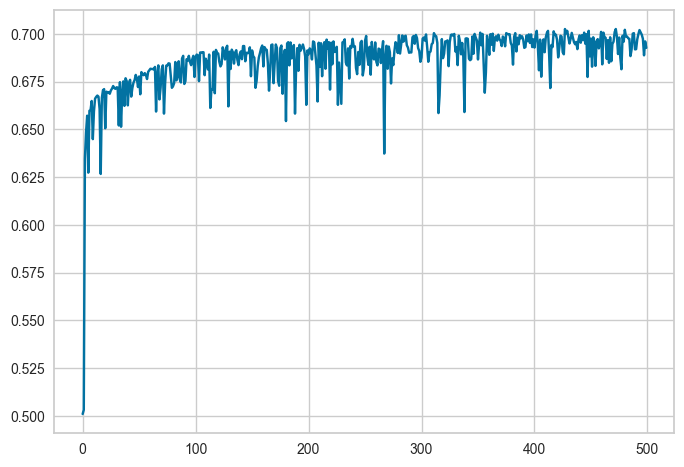

In [590]:
plt.plot(historico.history['val_accuracy'])

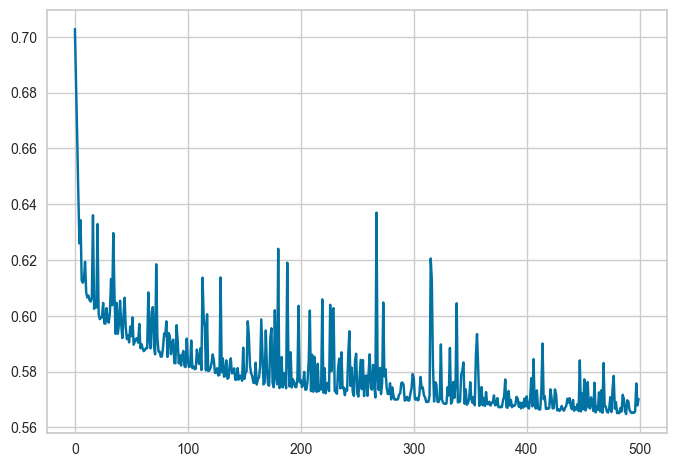

In [591]:
plt.plot(historico.history['val_loss'])

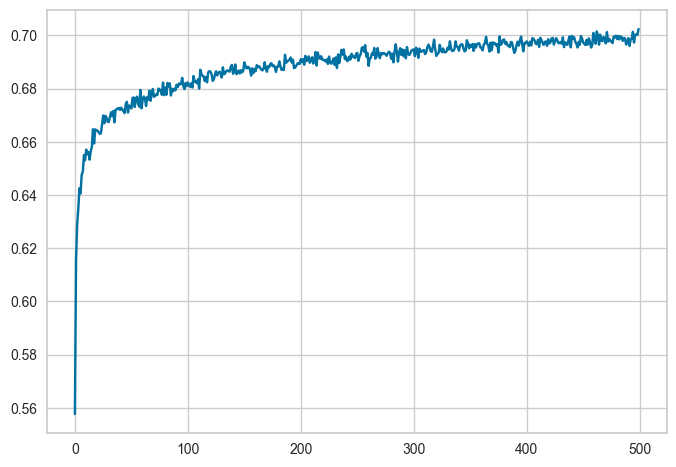

In [592]:
plt.plot(historico.history['accuracy'])

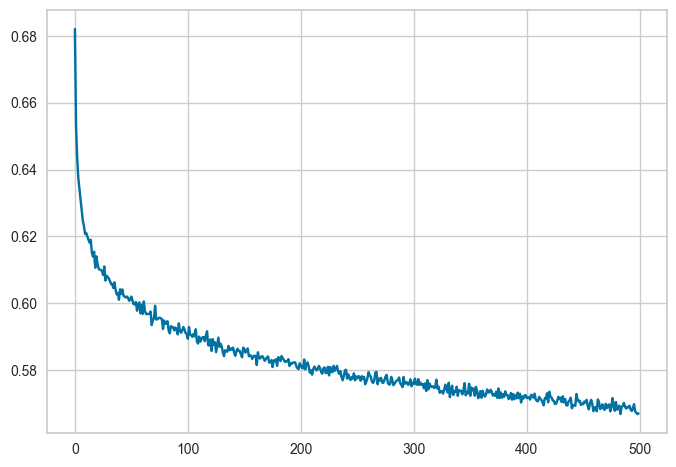

In [593]:
plt.plot(historico.history['loss'])

In [594]:
y_pred = modelo.predict(X_treino_final)

media = np.mean(y_pred)
print(media)
#obtendo o ponto medio

926/926 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
0.4526194


In [ ]:
limiarn = 0.5
y_pred = modelo.predict(X_teste_final)
y_pred_classes = (y_pred > limiarn).astype("int32")  # Converte as previsões para classes binárias


cm = confusion_matrix(y_teste_final, y_pred_classes)
print("Matriz de Confusão:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()
#Matriz de confusão do modelo rede neural

In [596]:
#bom desempenho das redes neurais.
#resultado semelhante ao do catboost classifier
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)


print(f"Accuracy: {accuracy:.5f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"F1-score: {f1_score:.4f}")

Accuracy: 0.69273
Recall (Sensibilidade): 0.6414
Precisão: 0.7139
F1-score: 0.6757


Aplicando na base OOTY - Redes neurais

In [597]:
historico2 = modelo.fit(X_fisico_final, y_fisico_final, epochs= 1, batch_size= 100)
#treinando o modelo com data treino e data teste para aplicação do modelo na base OOTY 

371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6947 - loss: 0.5726


In [ ]:

y_predot = modelo.predict(x_ot_final)
y_pred_classes2 = (y_predot > limiarn).astype("int32")  # Converte as previsões para classes binárias


cm = confusion_matrix(y_ot, y_pred_classes2)
print("Matriz de Confusão:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

In [599]:


auc = roc_auc_score(base_oty, y_pred_classes2)
print(f"AUC: {auc:.4f}")

# Calculando as taxas de verdadeiro positivo (TPR) e falso positivo (FPR)
fpr, tpr, thresholds = roc_curve(base_oty, y_predot)

# Calculando a diferença entre TPR e FPR (essa diferença é o KS)
ks_statistic = max(tpr - fpr)

# Mostrando o valor de KS
print(f'Índice KS: {ks_statistic:.4f}')




AUC: 0.6823
Índice KS: 0.3764


In [ ]:
m50 = (y_pred > 0.5).astype("int32")
unique, counts = np.unique(m50, return_counts=True)
supprop = dict(zip(unique, counts))
supprop = supprop.get(1, 0) 




print(f" propensos: {supprop}")



Orçamento Limitado - Quantos clientes vamos atingir

In [601]:
#Suponto que temos um budget para aplicação no valor aproximado de R$6.000.
#Um custo médio por cliente no valor de R$ 2,00
#Quantos cliente vamos alcançar. Qual será a probabilidade de corte. 


In [606]:
#clientes trabalhados
Clientes_trabalhados = 6000/2
Clientes_trabalhados
print(Clientes_trabalhados)
import heapq

#definindo ponto de corte a se trabalhar 
top_3000 = heapq.nlargest(3000, y_predot)
terceiro_milhar_maior = top_3000[-1]  # O último elemento é o 3000º maior

print("O 3000º maior valor é:", terceiro_milhar_maior)




 

3000.0
O 3000º maior valor é: [0.53716564]


TREINAR UMA REDE COM TODOS OS DADOS

In [ ]:
print(X_fisico_final.shape)

APLICANDO REDES NEURAIS NO POSTO DE ATENDIMENTO DIGITAL - NOVOS LEADS

In [ ]:
#A idfeia aqui é identificar possíveis novos relacionamentos e ofertas de produtos para clientes que não possuem
# relacionamento com a cooperativa 
y_predd = modelo.predict(X_digital_final)

y_pred_classes = (y_predd > limiarn).astype("int32")


cm = confusion_matrix(y_digital_final, y_pred_classes)




print("Matriz de Confusão:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

cm = confusion_matrix(y_digital_final, y_pred_classes)



